In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import cluster, preprocessing, mixture
from sklearn.cluster import KMeans as KM
from sklearn.mixture import GaussianMixture as GMM
import pandas as pd

# Gaussian distribution

In [2]:
# Random 1D data creation
data_1dim = rnd.normal(0, 10, 50)

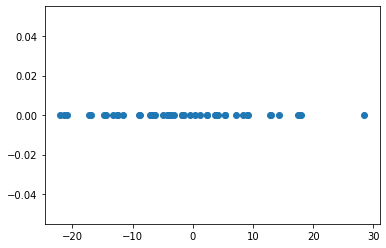

In [3]:
# Plot the created 1D data
plt.scatter(data_1dim, [0 for i in range(50)])

In [4]:
# Random 2D data creation
data_2dim = rnd.normal(0, 10, (50,2))

(-30.0, 30.0)

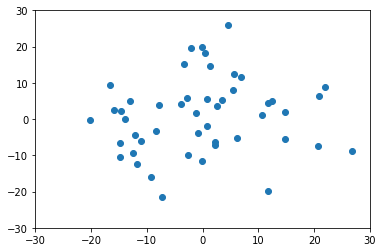

In [5]:
# Plot the created 2D data
plt.scatter(data_2dim[:, 0], data_2dim[:, 1])
plt.xlim(-30, 30)
plt.ylim(-30, 30)

# Gaussian Mixture Model

### 1D

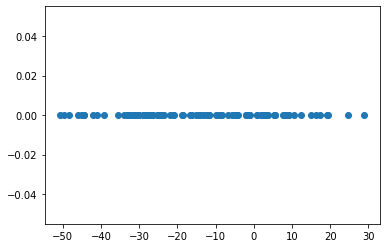

In [6]:
data1 = rnd.normal(0, 10, 50) # mean:0, variance:10
data2 = rnd.normal(-30, 10, 50) # mean:-30, variance:10
data_all = np.append(data1,data2)
plt.scatter(data_all, [0 for i in range(100)])

### Clustering and visualization with Gaussian Mixture Model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[]

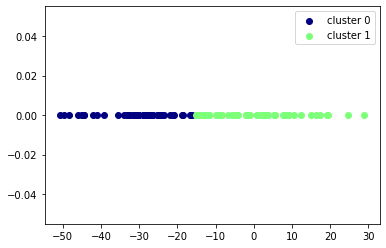

In [7]:
# Assumed number of clusters
cluster_num = 2

# Match the shape of the data
data_all = data_all.reshape((100, 1))
data_all_2d = np.concatenate([data_all, np.zeros((100, 1))], axis=1)
data_all_2d = data_all_2d.reshape((100, 2))

# Clustering by estimating Gaussian distribution parameters for each cluster
pred = GMM(n_components=cluster_num).fit_predict(data_all_2d)

# Plot
for i in range(cluster_num):
    cluster_datas = data_all_2d[pred==i]
    color = cm.jet(i/cluster_num)
    plt.scatter(cluster_datas[:, 0], cluster_datas[:, 1], c=color, label='cluster {}'.format(i))
plt.legend()
plt.plot()

### 2D

(100, 2)


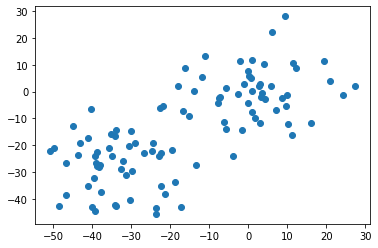

In [8]:
data_2D_1 = rnd.normal(0, 10, (50,2)) # mean:0, variance:10
data_2D_2 = rnd.normal(-30, 10, (50,2)) # mean:-30, variance:10
data_2D_all = np.append(data_2D_1,data_2D_2)
data_2D_all = data_2D_all.reshape((100, 2))
print(data_2D_all.shape)
plt.scatter(data_2D_all[:, 0], data_2D_all[:, 1])

### Clustering and visualization with Gaussian Mixture Model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[]

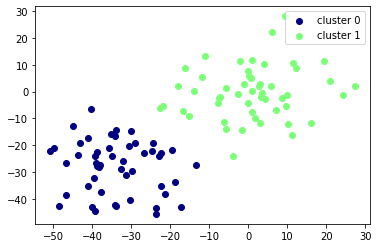

In [9]:
# Assumed number of clusters
cluster_num = 2

# Match the shape of the data
data_3D_all = np.concatenate([data_2D_all, np.zeros((100, 1))], axis=1)
data_3D_all = data_3D_all.reshape((100, 3))

# Clustering by estimating Gaussian distribution parameters for each cluster
pred = GMM(n_components=cluster_num).fit_predict(data_3D_all)

# Plot
for i in range(cluster_num):
    cluster_datas = data_3D_all[pred==i]
    color = cm.jet(i/cluster_num)
    plt.scatter(cluster_datas[:, 0], cluster_datas[:, 1], c=color, label='cluster {}'.format(i))
plt.legend()
plt.plot()

### iris data

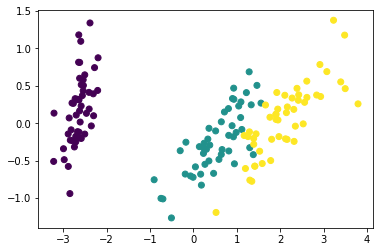

In [10]:
# iris data
iris = load_iris()
pca = PCA(n_components=2)
iris_data, iris_target = pca.fit_transform(iris.data), iris.target
iris_x = iris_data[:, 0]
iris_y = iris_data[:, 1]
plt.scatter(iris_x, iris_y, c=iris_target)

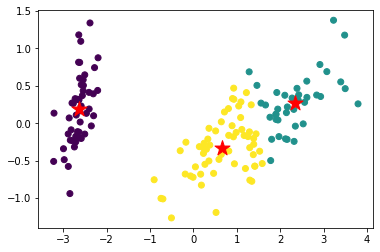

In [11]:
km = KM(n_clusters=3)
iris_km = km.fit(iris_data)
plt.scatter(iris_x, iris_y, c=iris_km.labels_)
plt.scatter(iris_km.cluster_centers_[:, 0], iris_km.cluster_centers_[:, 1], s=250, marker='*', c='red')

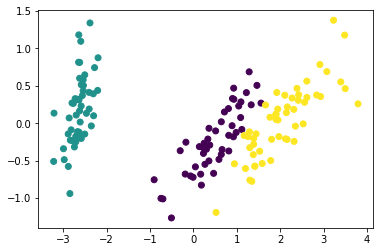

In [12]:
gmm = GMM(n_components=3, covariance_type='full')
iris_gmm = gmm.fit(iris_data)
iris_gmm = iris_gmm.predict(iris_data)
plt.scatter(iris_x, iris_y, c=iris_gmm)

### wine data

In [13]:
# wine data
df_wine_all = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
# Use varieties(0 rows, 1-3), colors(10 rows) and amount of proline(13 rows)
df_wine = df_wine_all[[0, 10, 13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


In [14]:
X = df_wine[["color", "proline"]]
sc = preprocessing.StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

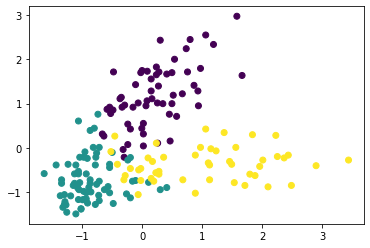

In [15]:
wine_x = X_norm[:, 0]
wine_y = X_norm[:, 1]
wine_z = df_wine["class"]
plt.scatter(wine_x, wine_y, c=wine_z)

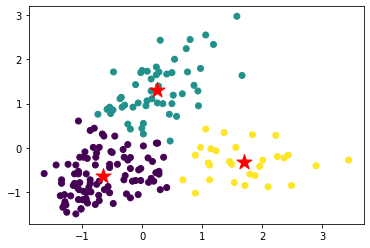

In [16]:
km = KM(n_clusters=3)
wine_km = km.fit(X_norm)
plt.scatter(wine_x, wine_y, c=wine_km.labels_)
plt.scatter(wine_km.cluster_centers_[:, 0], wine_km.cluster_centers_[:, 1], s=250, marker='*', c='red')

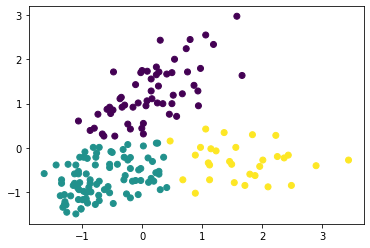

In [17]:
gmm = GMM(n_components=3, covariance_type='full')
wine_gmm = gmm.fit(X_norm)
wine_gmm = wine_gmm.predict(X_norm)
plt.scatter(wine_x, wine_y, c=wine_gmm)